In [ ]:
'''
Adam Gradient Descent : (Momentum + RMSProp) 
    - Momentum GD (moving faster in gentle regions) and RMSProp GD (adjusting learning rate).
    - 

'''

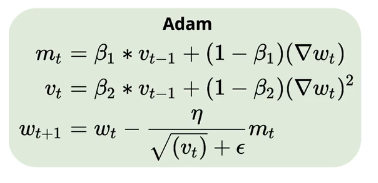

In [ ]:
'''
Varibales:

    - It calculates an exponential moving average of the gradient and the squared gradient
    - parameters beta1 and beta2 control the decay rates of these moving averages.
    - Adam maintains two histories,
            - ‘mₜ’ similar to the history used in Momentum GD
            - ‘vₜ’ similar to the history used in RMSProp.
            
    - m_w & m_b : keep track of momentum history
    
    - v_w & v_b which is used to decay the denominator and prevent its rapid growth just like in RMSProp.
    
    - Epsilon. Is a very small number to prevent any division by zero in the implementation

'''

'''
Recommended values :

beta1 = 0.9
beta2 = 0.9999
alpha (lr) = 0.0001
ε (Epsilon) :10^-8


'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = [30, 35, 37, 59, 70, 76, 88, 100 ]
Y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [10]:
iteration = []
loss = []

theta0=0
theta1=0


# momentum histrory
mb=0
mw=0

# velocity history
vb=0
vw=0

beta1 =0.9

beta2 =0.999

num_updates = 0

lr =0.001

eps = 1e-8 # Epsilon

for epoch in range(100):
    iteration.append(epoch)
    
    dtheta0=0
    dtheta1=0
    
    for x,y in zip(X,Y):
        
        # pedict the output
        predicted = theta0 + x * theta1
        
        n = 1 # one Sample
        dtheta0 += (-(2/n) * np.sum(np.subtract(y,predicted)))
        dtheta1 += (-(2/n) * np.sum(np.multiply(np.subtract(y,predicted),x)))
        
        num_updates +=1
        
    mw = beta1 * mw + (1-beta1) * dtheta0
    mb = beta1 * mb + (1-beta1) * dtheta1
    
    vw = beta2 * vw + (1-beta2) * dtheta0**2
    vb = beta2 * vb + (1-beta2) * dtheta1**2
    
    
    # This part is for the Bias Correction
    mw_c = mw / (1 - np.power(beta1, num_updates))
    mb_c = mb / (1 - np.power(beta1, num_updates))
    
    vw_c = vw / (1 - np.power(beta2, num_updates))
    vb_c = vb / (1 - np.power(beta2, num_updates))
    
    theta0 = theta0 - (lr / np.sqrt(vw_c) + eps) * mw_c
    theta1 = theta1 - (lr / np.sqrt(vb_c) + eps) * mb_c
    
     # pedict theoutput
    predicted = theta0 + X * theta1
    
    cost = np.mean((Y - predicted))
    loss.append(cost)  
    

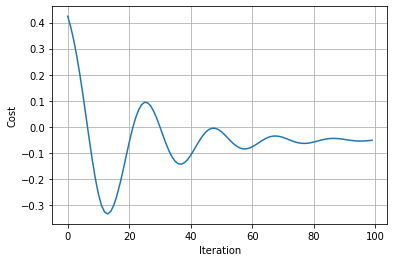

In [11]:
import matplotlib.pyplot as plt

plt.plot(iteration,loss)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()